# MARKET BASKET ANLAYSIS
 
 **(Using Apriori algorithm in mlxtend library)**
 

**"Market basket analysis scrutinizes the products customers tend to buy together, and uses the information to decide whichs products should be cross-sold or promoted together"**

* Market basket is performed on transactional data at customer level. It's part of unsupervised learning hence requires minimum data wrangling and feature engingeering.
* Output consists of a set of rules which define associations between products bought based on lift, confidence level and support
* This analysis will be performed through **Apriori algorithm** within **mlxtend** package which is downloaded to python
* MBA is used for **store layouts, promotions, cross selling, disocunt policy, online recommendation engines, spare parts ordering and click stream tracking**
* Association rules are written as : {A} =>{B} where A = Antecedent and B= Consequent and the rule shows that there is a relationship between A and B based on Lift, confidence level and support that customers have bought these two products frequently in one transaction
* **Support:** It is calcuated as: **No.of transaction containing a rule/total number of transactions**. It could be **higher** if you want to establish if this is really strong relationshiop and **lower** if you want to find hidden relationship. Higher the support means that these are popular combination of products which customers buy frequently. 
* **Confidence:** This measures the **probability of occurance of transactions for consequent product and shows how much a consequent product depends on antecedent product**. 50% confidence level means that that if a customer buying product A, there are 50% chances they would also buy product B. So B's dependency on product A is 50%
* **Lift:** Predicts the strength of a relationship. Lift = 1 means the rule is completely independent i.e. consequent product doesn't depend on antecedent product whereas Lift>1 means consequent product strongly depends on antecedent product. Lift calculates **how much in times the actual rule is higher than the estimated probabaility**.**Lift is how often the condition actually happened compared to the estimated chance for that to happen**.

Let me explain with an example of “baby cosmetic” → “cake bar” rule. Let’s say there were 1000 transactions, out of which 100 transactions contain ‘baby cosmetic’, then the estimated probability of having “baby cosmetic” is 10% (100/1000=0.1). If 200 transactions contain ‘cake bar’, then the probability is 20% (200/1000=0.2). Now, the probability of having both in same transactions “baby cosmetic” and “cake bar” having is 0.1 * 0.2 = 0.02 (2%). But, if the actual number of the transactions containing both ‘baby cosmetic’ and ‘cake bar’ turned out to be 200, the actual rate of having both is 20% (200/1000=0.2), which means the actual number is 10 times higher than the estimated probability. This 10 is lift. **You can regard this as how far it is from the natural phenomenon**. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
path= 'C:/Users/ullahz/Desktop/datasets/market_basket/online_retail_data.csv'

#use latin-1 as unicode to encode the data in the dataset. Unicode is the opposite of string coding 
dataset = pd.read_csv(path,encoding='ISO-8859-1')
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01/12/2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01/12/2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01/12/2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01/12/2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01/12/2010 08:34,1.69,13047.0,United Kingdom


**Findings**
1. Corporate customers/businesses
2. Multiple countries

# Data wrangling

**Data cleaning**

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
dataset['Description']= dataset['Description'].fillna(dataset['Description'].mode().iloc[0])

**Checking if our data has refunds**

In [6]:
dataset[dataset['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01/12/2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01/12/2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01/12/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01/12/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01/12/2010 10:24,0.29,17548.0,United Kingdom


As our dataset contains refunds hence we need to remove refund observations from our dataset

In [7]:
dataset = dataset[dataset['Quantity']>0]
dataset.shape

(531285, 8)

# Exploratory data analysis (EDA)

We will now look at top selling products and would graph them for better visualisation

In [8]:
dataset['Description'].value_counts().iloc[:10]

WHITE HANGING HEART T-LIGHT HOLDER    2919
JUMBO BAG RED RETROSPOT               2115
REGENCY CAKESTAND 3 TIER              2019
PARTY BUNTING                         1707
LUNCH BAG RED RETROSPOT               1594
ASSORTED COLOUR BIRD ORNAMENT         1489
SET OF 3 CAKE TINS PANTRY DESIGN      1399
PACK OF 72 RETROSPOT CAKE CASES       1370
LUNCH BAG  BLACK SKULL.               1328
NATURAL SLATE HEART CHALKBOARD        1263
Name: Description, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

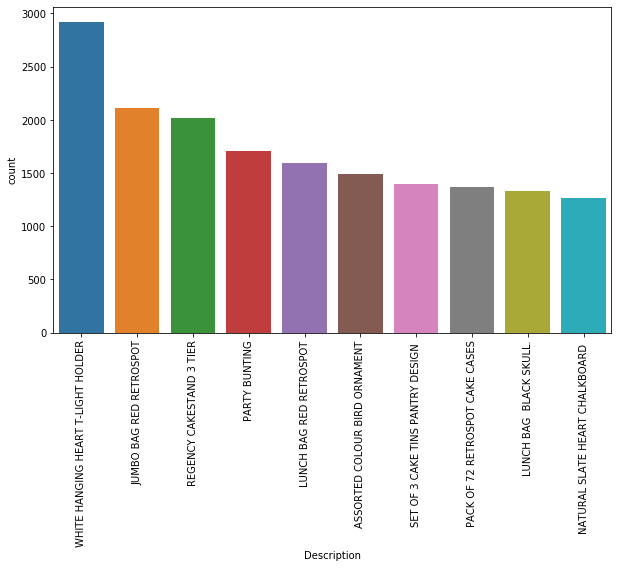

In [9]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Description', data = dataset,
              order = dataset['Description'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

**Checking geographic data**

In [10]:
country_set = dataset[['Country', 'InvoiceNo']]
country_set = country_set.pivot_table(columns='Country', aggfunc='count')
country_set.sort_values('InvoiceNo', axis=1, ascending=False).T

,InvoiceNo
Country,
United Kingdom,486286
Germany,9042
France,8408
EIRE,7894
Spain,2485
Netherlands,2363
Belgium,2031
Switzerland,1967
Portugal,1501


**Most popular products**

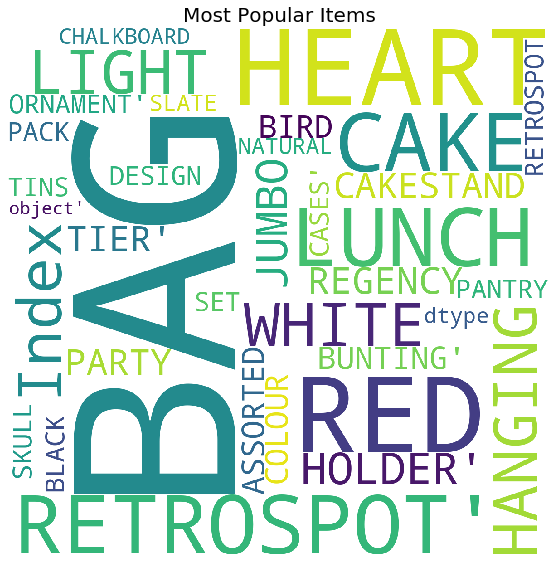

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,
                      height = 1200,
                      max_words = 121).generate(str(dataset['Description'].value_counts().iloc[:10].index))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

**Frequency of most popular products**

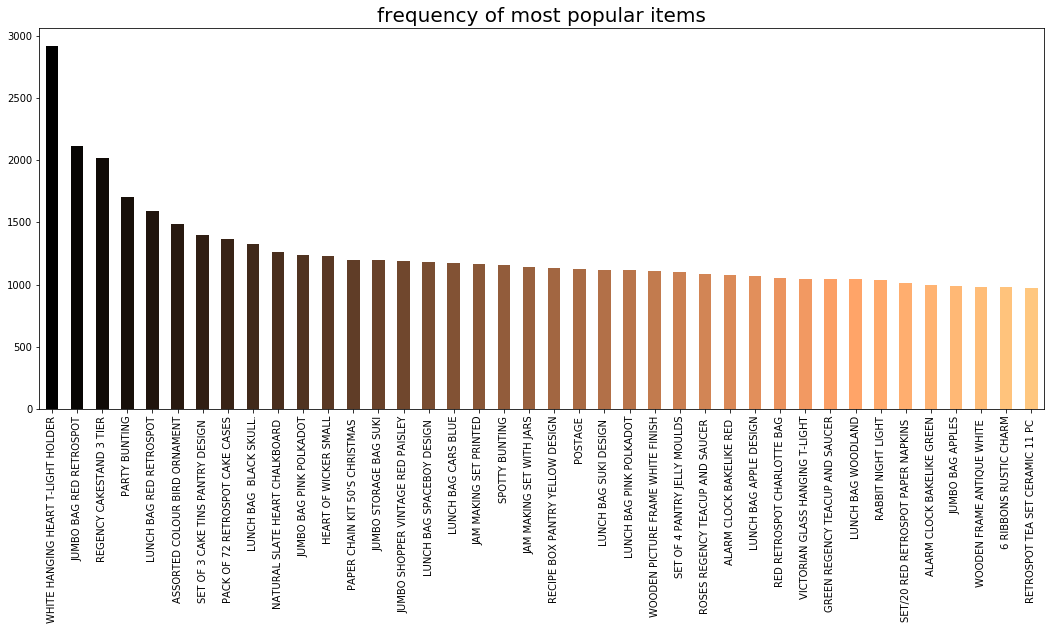

In [12]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
dataset['Description'].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.show()

# Applying Apriori Algorithm

* Apriori algorithm expects data to be in a **one-hot-encoded** pandas dataframe. We need to consolidate data by **InvoiceNo** where each row will have a unique invoice number and the columns will consist of the **whole product range** where each bought product will be encoded as 1 and nil sales products will be encoded as 0. Please remember we have already eliminated refund (negative) values which would otherwise be coded as 0 
* For this analysis, we are only using France

In [13]:
basket = (dataset[dataset['Country'] =="France"]
 .pivot_table(index="InvoiceNo", columns="Description", values="Quantity", aggfunc = "sum", fill_value =0))

In [14]:
basket.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Applying one hot encoding**

In [15]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dropping postage column as this does not show a product hence irrelevant to our analysis

In [16]:
basket_sets.drop('POSTAGE', inplace=True, axis=1)

**Setting parameters for algorithm**
* Minimum Support selected is 7%. You can increase the value to 10% or above for better accuracy however that could end up producing less number of rules
* The criteria would be: ** Building frequent products using Apriori and building the rules with association_rules**

In [17]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.071429,(4 TRADITIONAL SPINNING TOPS)
1,0.096939,(ALARM CLOCK BAKELIKE GREEN)
2,0.102041,(ALARM CLOCK BAKELIKE PINK)
3,0.094388,(ALARM CLOCK BAKELIKE RED )
4,0.081633,(BAKING SET 9 PIECE RETROSPOT )
5,0.071429,(CHILDRENS CUTLERY DOLLY GIRL )
6,0.099490,(DOLLY GIRL LUNCH BOX)
7,0.096939,(JUMBO BAG RED RETROSPOT)
8,0.076531,(JUMBO BAG WOODLAND ANIMALS)
9,0.125000,(LUNCH BAG APPLE DESIGN)


**Generating rules by lift and confidence**

**min_threshhold=1 as otherwise the products will be indepedent to other**

In [18]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
3,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135
5,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061
6,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.099490,0.125000,0.071429,0.717949,5.743590,0.058992,3.102273
7,(SPACEBOY LUNCH BOX ),(DOLLY GIRL LUNCH BOX),0.125000,0.099490,0.071429,0.571429,5.743590,0.058992,2.101190
8,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE ),0.137755,0.168367,0.089286,0.648148,3.849607,0.066092,2.363588
9,(PLASTERS IN TIN CIRCUS PARADE ),(PLASTERS IN TIN SPACEBOY),0.168367,0.137755,0.089286,0.530303,3.849607,0.066092,1.835747


**Explanation**

* Fro first rule, Alarm clock bakelike pink =>Alarm clcok bakelike green

**Support =7.3%** which means this rule is appearing in 7.5% of the whole dataset

**Confidence =72.5%** which means both products were bought 72.5% times ogether if a customer buys pink alarm clock

**Lift = 7.4** which means the presence of pink alarm clock in a transaction will increase the probability of having green alarm clcok in the same transaction by 7.4 times 

**Lift formula = support/support(A)*support(B)**

**Building rules by playing around with a higher lift and confidence level**

Pandas dataframes make it easy to filter the results further. Lets set the new rules by setting following parameters:

1. at least 2 antecedents
2. a confidence level of over 75%
3. a lift score of voer 1.2

In [19]:
rules['antecedent_len'] = rules['antecedents'].apply(lambda x:len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859,1
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383,1
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181,1
3,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878,1
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135,1
5,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061,1
6,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.099490,0.125000,0.071429,0.717949,5.743590,0.058992,3.102273,1
7,(SPACEBOY LUNCH BOX ),(DOLLY GIRL LUNCH BOX),0.125000,0.099490,0.071429,0.571429,5.743590,0.058992,2.101190,1
8,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE ),0.137755,0.168367,0.089286,0.648148,3.849607,0.066092,2.363588,1
9,(PLASTERS IN TIN CIRCUS PARADE ),(PLASTERS IN TIN SPACEBOY),0.168367,0.137755,0.089286,0.530303,3.849607,0.066092,1.835747,1


In [20]:
rules[ (rules['antecedent_len'] >= 1) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383,1
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181,1
3,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878,1
5,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061,1
13,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.137755,0.170918,0.104592,0.759259,4.442233,0.081047,3.443878,1
14,(SET/20 RED RETROSPOT PAPER NAPKINS ),(SET/6 RED SPOTTY PAPER CUPS),0.132653,0.137755,0.102041,0.769231,5.584046,0.083767,3.736395,1
16,(SET/20 RED RETROSPOT PAPER NAPKINS ),(SET/6 RED SPOTTY PAPER PLATES),0.132653,0.127551,0.102041,0.769231,6.030769,0.085121,3.780612,1
17,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS ),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735,1
18,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122,1
19,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041,1


**Link for further example:**

https://www.kaggle.com/roshansharma/market-basket-analysis